In [173]:
# !pip install statsmodels
# !pip install cv2


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes
from math import pi, sqrt
import random
from scipy import stats
from scipy.stats import pearsonr

from collections import Counter

pd.options.mode.chained_assignment = None 

In [5]:
df = pd.read_csv('VW01012019-060922.csv', dayfirst=True)

# for i in range(1,len(file_list)):
#     data = pd.read_csv(file_list[i], delimiter=';')
#     df_c = pd.DataFrame(data)
#     df = pd.concat([df, df_c])  
df.rename({'Местное время во Владимире' : 'Date'}, axis='columns', inplace = True)
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%y %H:%M')
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.isnull().sum()

Date        0
T           6
Po          4
P           9
Pa         23
U          10
DD          2
Ff          2
ff10    10711
ff3      9695
N          30
WW          0
W1       6149
W2       6149
Tn       9459
Tx       9843
Cl        954
Nh        953
H         937
Cm       2084
Ch       5437
VV         29
Td          4
RRR      8454
tR       8454
E       10486
Tg      10488
E'      10737
sss     10737
dtype: int64

In [7]:
df['T'].fillna(method='ffill', inplace=True)
df['Po'].fillna(method='ffill', inplace=True)
df['Po'].fillna(method='ffill', inplace=True)
df['P'].fillna(method='ffill', inplace=True)
df['Pa'].fillna(method='ffill', inplace=True)
df['DD'].fillna(method='ffill', inplace=True)
df['Ff'].fillna(method='ffill', inplace=True)
df['U'].fillna(method='ffill', inplace=True)
df['N'].fillna(method='ffill', inplace=True)
df['VV'].fillna(method='ffill', inplace=True)
df['Td'].fillna(method='ffill', inplace=True)
df.dropna(axis=1, inplace = True)
df.isnull().sum()

Date    0
T       0
Po      0
P       0
Pa      0
U       0
DD      0
Ff      0
N       0
WW      0
VV      0
Td      0
dtype: int64

In [8]:
df = df.sort_values(by = "Date")
df

,Date,T,Po,P,Pa,U,DD,Ff,N,WW,VV,Td
11235,2019-01-01 00:00:00,-7.8,753.0,769.8,-0.2,92.0,"Ветер, дующий с юго-юго-запада",3.0,100%.,Снег непрерывный слабый в срок наблюдения.,4.0,-8.9
11234,2019-01-01 03:00:00,-9.7,752.7,769.6,-0.3,91.0,"Ветер, дующий с юго-юго-запада",3.0,100%.,Снег непрерывный слабый в срок наблюдения.,4.0,-10.9
11233,2019-01-01 06:00:00,-11.5,751.2,768.2,-1.5,90.0,"Ветер, дующий с юго-юго-запада",1.0,40%.,Дымка.,4.0,-12.8
11232,2019-01-01 09:00:00,-10.0,750.1,766.9,-1.1,91.0,"Ветер, дующий с юга",2.0,100%.,Снег непрерывный слабый в срок наблюдения.,4.0,-11.2
11231,2019-01-01 12:00:00,-7.9,747.7,764.3,-2.4,91.0,"Ветер, дующий с юга",3.0,100%.,Снег непрерывный слабый в срок наблюдения.,4.0,-9.1
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-11-05 21:00:00,-1.4,754.5,770.9,0.5,79.0,"Ветер, дующий с северо-запада",3.0,100%.,,10.0,-4.7
3,2022-11-06 00:00:00,-1.8,755.4,771.8,0.9,80.0,"Ветер, дующий с запада",2.0,100%.,,10.0,-4.8
2,2022-11-06 03:00:00,-1.9,755.5,772.0,0.1,81.0,"Ветер, дующий с запада",1.0,100%.,,10.0,-4.7
1,2022-11-06 06:00:00,-2.5,755.5,772.0,0.0,83.0,"Ветер, дующий с западо-северо-запада",2.0,100%.,,10.0,-5.0


# ARIMA

In [9]:
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable

In [10]:
df['D'] = df['Date'].dt.day
df['M'] = df['Date'].dt.month
df['Y'] = df['Date'].dt.year
df['W'] = df['Date'].dt.week

C:\Users\1\AppData\Local\Temp\ipykernel_12504\1150548952.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['W'] = df['Date'].dt.week


<AxesSubplot:xlabel='Date'>

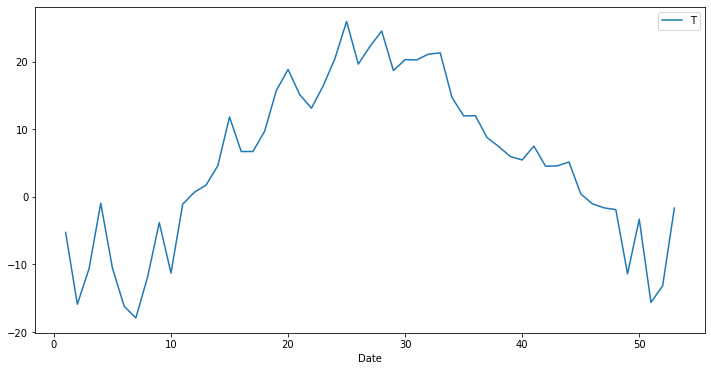

In [18]:
list_ = []
daterange = []


for w in (df['W'].unique()):
    c = df.loc[(df['W'] == w) & (df['Y'] == 2021)]
    list_.append(round(c['T'].mean(), 2))
    daterange.append(w)



df1 = pd.DataFrame({'Date':daterange, 'T':list_})
df1 = df1.set_index('Date')
df1.plot(figsize=(12,6))


<AxesSubplot:xlabel='Date'>

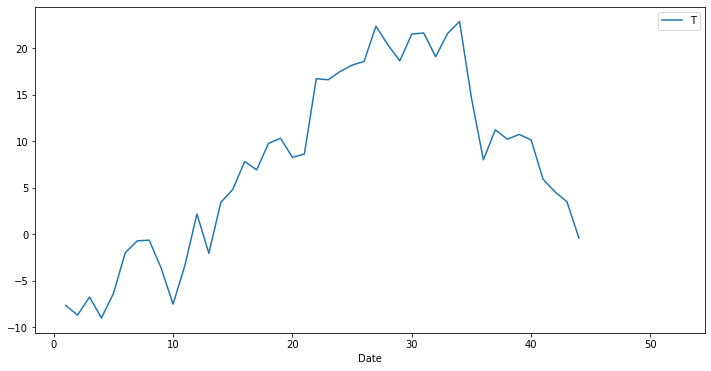

In [17]:
list_1 = []
daterange_1 = []


for w in (df['W'].unique()):
    c = df.loc[(df['W'] == w) & (df['Y'] == 2022)]
    list_1.append(round(c['T'].mean(), 2))
    daterange_1.append(w)



df2 = pd.DataFrame({'Date':daterange_1, 'T':list_1})
df2 = df2.set_index('Date')
df2.plot(figsize=(12,6))